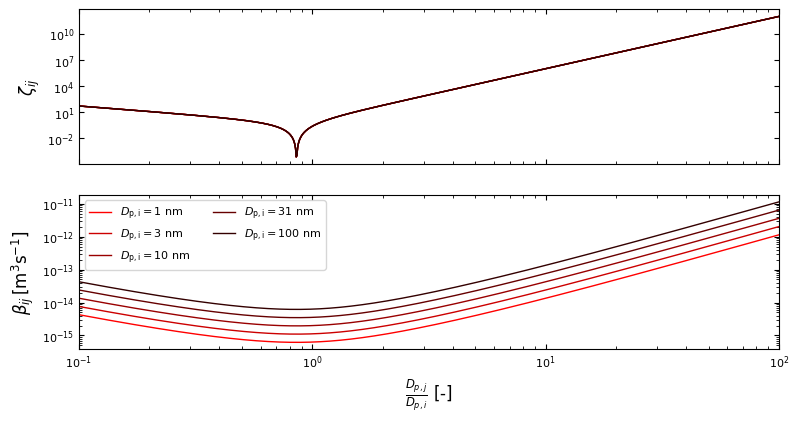

In [56]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl

def pltNormal():
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    #plt.rcParams['figure.subplot.bottom'] = 0.2
    #plt.rcParams['figure.subplot.left'] = 0.2
    #plt.rcParams['font.family'] = 'Arial'
    plt.rcParams["font.size"]=8
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[[1,0,0]\
        ,[0.8,0,0], [0.6,0,0], [0.4,0,0], [0.2,0,0],[0,0,0]]) 

def axNormal(ax):
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

            
pltNormal()
fig, axs = plt.subplots(2,1,figsize=(10,5),sharex=True)
for ax in axs.flat:
    axNormal(ax)

rho=1000
dpdp=np.logspace(-1,2,1000)
kb=1.38e-23
T=300

for dpi in np.logspace(-9,-7,5):
    dpj=dpdp*dpi
    mj=rho*np.pi*dpj**3/6.0
    aij=0.5*(dpi+dpj)
    A=np.pi*aij*aij
    mi=rho*np.pi*dpi**3/6.0
    mij=1/(1/mi+1/mj)
    v0=(8*kb*T/mij/np.pi)**0.5
    beta=v0*A
    y=dpdp**3+0.25-0.75/dpdp
    axs.flat[0].plot(dpdp,y**2,linewidth=1)
    axs.flat[1].plot(dpdp,beta, label=r"$D_{\rm{p},i} = $"+str(int(dpi*1e9))+" nm",linewidth=1)

axs.flat[0].set_yscale("log")
axs.flat[1].set_yscale("log")
axs.flat[0].set_xscale("log")
axs.flat[1].set_xscale("log")
axs.flat[0].set_xlim(1e-1,1e2)
axs.flat[1].set_xlim(1e-1,1e2)
axs.flat[1].set_xlabel(r"$\frac{D_{p,j}}{D_{p,i}} $ [-]",size=12)
axs.flat[0].set_ylabel(r"$\zeta_{ij}$",size=12)
axs.flat[1].set_ylabel(r"$\beta_{ij}\, \rm{[m^{3} s^{-1}]}$",size=12)
plt.legend(ncol=2)
plt.savefig("Figure1.png", dpi=100)
plt.show()